### Downloading the dataset from kaggles
Please check kaggle docuumentation on how to download dataset.

In [0]:
!kaggle competitions download -c histopathologic-cancer-detection

  0% 0.00/1.33M [00:00<?, ?B/s]
100% 1.33M/1.33M [00:00<00:00, 90.4MB/s]
  0% 0.00/5.10M [00:00<?, ?B/s]
100% 5.10M/5.10M [00:00<00:00, 83.7MB/s]
 99% 1.29G/1.30G [00:09<00:00, 168MB/s]
100% 1.30G/1.30G [00:09<00:00, 145MB/s]
100% 4.96G/4.98G [00:35<00:00, 198MB/s]
100% 4.98G/4.98G [00:35<00:00, 149MB/s]


In [0]:
!ls

kaggle.json  sample_submission.csv.zip	train_labels.csv.zip
sample_data  test.zip			train.zip


## Using fast.ai which runs on top of PyTorch
check out their documentation at https://fast.ai

In [0]:
from fastai.vision import *
from IPython.display import clear_output

In [0]:
!unzip train.zip -d train
clear_output()

In [0]:
!rm train.zip

In [0]:
!ls
!unzip train_labels.csv.zip
!rm train_labels.csv.zip

kaggle.json  sample_submission.csv.zip	train
sample_data  test.zip			train_labels.csv.zip
Archive:  train_labels.csv.zip
  inflating: train_labels.csv        


In [0]:
!unzip test.zip -d test
clear_output()
!rm test.zip

In [0]:
len(ds_tfms)

2

### Creating dataloader

1. resize image to 96*96 px
2. Do image augmentation
3. Normalize the images

In [0]:
ds_tfms=get_transforms(do_flip = False)
data = ImageDataBunch.from_csv('', folder='train', size=96, suffix='.tif', csv_labels='train_labels.csv', test = 'test', ds_tfms = ds_tfms)
data.normalize()

ImageDataBunch;

Train: LabelList
y: CategoryList (176020 items)
[Category 0, Category 1, Category 0, Category 0, Category 0]...
Path: .
x: ImageItemList (176020 items)
[Image (3, 96, 96), Image (3, 96, 96), Image (3, 96, 96), Image (3, 96, 96), Image (3, 96, 96)]...
Path: .;

Valid: LabelList
y: CategoryList (44005 items)
[Category 0, Category 0, Category 0, Category 0, Category 1]...
Path: .
x: ImageItemList (44005 items)
[Image (3, 96, 96), Image (3, 96, 96), Image (3, 96, 96), Image (3, 96, 96), Image (3, 96, 96)]...
Path: .;

Test: LabelList
y: EmptyLabelList (57458 items)
[EmptyLabel , EmptyLabel , EmptyLabel , EmptyLabel , EmptyLabel ]...
Path: .
x: ImageItemList (57458 items)
[Image (3, 96, 96), Image (3, 96, 96), Image (3, 96, 96), Image (3, 96, 96), Image (3, 96, 96)]...
Path: .

In [0]:
pd.read_csv('train_labels.csv').head()

,id,label
0,f38a6374c348f90b587e046aac6079959adf3835,0
1,c18f2d887b7ae4f6742ee445113fa1aef383ed77,1
2,755db6279dae599ebb4d39a9123cce439965282d,0
3,bc3f0c64fb968ff4a8bd33af6971ecae77c75e08,0
4,068aba587a4950175d04c680d38943fd488d6a9d,0


### Creating a Restnet-50 model with transfer learning

In [0]:
f_score = partial(fbeta, thresh=0.2, beta = 1)
learn = create_cnn(data, models.resnet50, metrics=[accuracy])

### Finding an appropriate learning rate

In [0]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


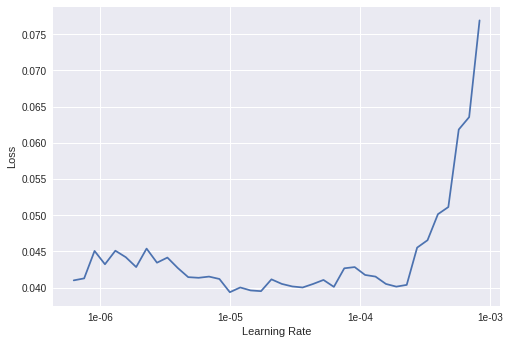

In [0]:
learn.recorder.plot()

In [0]:
??learn.fit_one_cycle

In [0]:
learn.unfreeze()

In [0]:
lr = slice(1e-05, 2e-04)
learn.fit(2, lr)

epoch,train_loss,valid_loss,accuracy
1,0.102986,0.108847,0.962504
2,0.086113,0.101443,0.965208


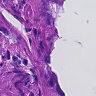

In [0]:
data.train_ds[25][0]

In [0]:
learn.predict(data.train_ds[25][0])

(MultiCategory 1, tensor([0., 1.]), tensor([0.3131, 0.6927]))

In [0]:
preds,y,losses = learn.get_preds(with_loss=True)


In [0]:
interp = ClassificationInterpretation(data, preds, y, losses)

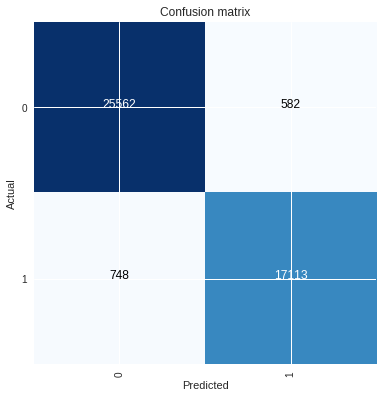

In [0]:
interp.plot_confusion_matrix()
